In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, svm
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Data Reading 

In [2]:
imdbDataset = pd.read_csv(r'IMDB_Dataset.csv')
imdbDataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
imdbDataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdbDataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#Preprocessing 


In [7]:
imdbDataset['sentiment']=imdbDataset['sentiment'].map({'positive': 1, 'negative': 0})
stopWords = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()
def preprocessing(content):
    #removing html tags
    content=re.sub('<[^>]*>','',content)
    #remove brackets, integers and alphabets starting of the string 
    content = re.sub(r'[^A-Za-z0-9]+',' ',content)
    #lower the words
    content = content.lower()
    #word stemming using porterStemmer
    ps=nltk.porter.PorterStemmer()
    content= ' '.join([ps.stem(word) for word in content.split(" ")])
    #lemmatize group different words in same form 
    content = [lemmatizer.lemmatize(i) for i in content.split(" ")]
    #pos tagging for verb 
    content = [lemmatizer.lemmatize(i, "v") for i in content]
    content =  " ".join([word for word in content if not word in stopWords])
    return content

imdbDataset['ProcessedReviews'] = imdbDataset.review.apply(lambda x: preprocessing(x))


In [8]:
#preprocessed data
imdbDataset

,review,sentiment,ProcessedReviews
0,One of the other reviewers has mentioned that ...,1,one review ha mention watch 1 oz episod hook r...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu veri unassu...
2,I thought this was a wonderful way to spend ti...,1,think thi wa wonder way spend time hot summer ...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi hi clo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...
...,...,...,...
49995,I thought this movie did a down right good job...,1,think thi movi right good job creativ origin f...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,0,cathol teach parochi elementari school nun tea...
49998,I'm going to have to disagree with the previou...,0,go disagre previou comment side maltin thi one...


#Splitting dataset

In [9]:
x = imdbDataset['ProcessedReviews']
y = imdbDataset['sentiment']
x.shape

(50000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# X_train.shape
print("Training example size",X_train.shape)
print("Testing example size",X_test.shape)


Training example size (40000,)
Testing example size (10000,)


Feature Extraction 

In [11]:
freqWords = CountVectorizer().fit(imdbDataset['ProcessedReviews'].values.astype('U'))
featureTrain = freqWords.transform(X_train.values.astype('U'))
featureTest = freqWords.transform(X_test.values.astype('U'))


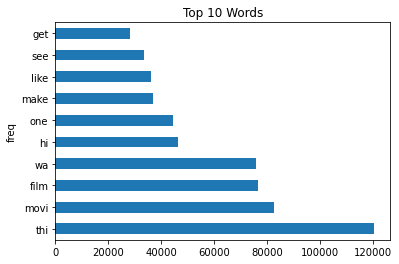

In [12]:
features = pd.DataFrame(featureTrain.toarray(), columns=freqWords.get_feature_names())
features.sum().sort_values(ascending=True)[:10].plot(kind='barh', title='Top 10 Words',xlabel='freq', ylabel='Words' )

Algorithm Training

In [19]:
SVM = SVC()
# fit the model with pre-processed data
SVM.fit(featureTrain, y_train)
#perform classification and prediction on samples in tf_test
predicted = SVM.predict(featureTest)

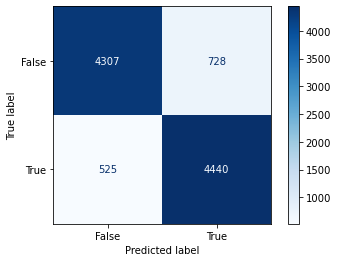

In [20]:
#plot confusion matrix for SVM
confusionMatrixSVM = metrics.confusion_matrix(y_test, predicted)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrixSVM, display_labels = [False, True])
cm.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
#print classification report for SVM
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5035
           1       0.86      0.89      0.88      4965

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [13]:
#logistic regression model
lr=LogisticRegression(max_iter=700,C=1,random_state=42)
lrFit=lr.fit(featureTrain, y_train)
lrPredict=lr.predict(featureTest)

In [16]:
lrAccuracyScore=accuracy_score(y_test,lrPredict)
print("Logistic Regression Accuracy  :",lrAccuracyScore)

Logistic Regression Accuracy  : 0.8806


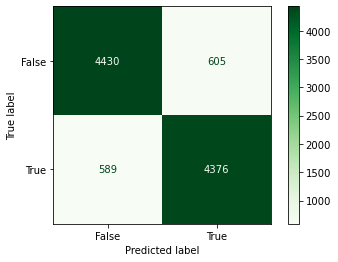

In [18]:
# Logistic Regression COnfusion Matrix report
confusionMatrixLR = metrics.confusion_matrix(y_test, lrPredict)
cmLR = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrixLR, display_labels = [False, True])
cmLR.plot(cmap=plt.cm.Greens)
plt.show()

In [23]:
#random forest classifier 
randomForest = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
randomForest.fit(featureTrain, y_train)


RandomForestClassifier(criterion='entropy')

In [24]:
randomForestPred = randomForest.predict(featureTest)

In [15]:
rfAccuracyScore=accuracy_score(y_test,randomForestPred)
print("Random Forest Accuracy  :",rfAccuracyScore)

Random Forest Accuracy  : 0.8593


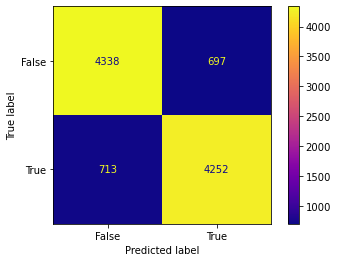

In [22]:
#confusion matrix random forest
confusionMatrixRF = metrics.confusion_matrix(y_test, randomForestPred)
cmRF = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrixRF, display_labels = [False, True])
cmRF.plot(cmap=plt.cm.plasma)
plt.show()